Data Story(Healthcare Project)  

The dataset focuses on mental health data, measuring variables related to frequent mental distress, primarily among older adults. Below is a comprehensive story derived from the data analysis and modeling results:

1. Data Overview

The dataset contains 24,776 rows and 12 columns.
Key columns include:
YearStart: The starting year of the survey (range: 2011–2014).
LocationDesc: Geographical locations (United States and its territories).
Class and Topic: High-level categorization of mental health topics.
Data_Value: The primary metric representing percentages related to mental health outcomes.
Low_Confidence_Limit and High_Confidence_Limit: Confidence intervals for Data_Value.
Age_Group: Age bracket of individuals (e.g., 50-54 years).

Descriptive Statistics
Numerical Variables Summary:

Data_Value has a mean of 37.94%, indicating that on average, around 38% of the surveyed population experienced mental distress.
The values range from 1.3% to 99.7%, showing significant variability in the percentage of mental health distress across different regions or demographics.
Skewness analysis indicates that the data is slightly positively skewed, meaning most data points are concentrated on the lower end.

Preprocessing Pipeline
The data preprocessing involved the following steps:

Categorical Features:
Columns like Class were processed using One-Hot Encoding, transforming them into numerical format for the model.
Numerical Features:
Columns such as Low_Confidence_Limit and High_Confidence_Limit were scaled using StandardScaler to ensure all features were on a similar scale.
Missing values in numerical columns were imputed with their mean, and categorical missing values were filled with the most frequent category.

Model Training and Evaluation
Model: A Random Forest Regressor was used, a robust ensemble learning method suitable for both regression tasks and handling mixed data types.

Performance:

Training Root Mean Squared Error (RMSE): 0.08
Training R²: 1.00 (perfect fit)
Testing RMSE: 0.11
Testing R²: 1.00
These results indicate the model performed exceptionally well, explaining nearly 100% of the variance in Data_Value for both the training and testing datasets.

Predictions:

Example predictions range from 0% to 87%, demonstrating the model's ability to predict Data_Value accurately for unseen data.

Insights and Observations
Mental Health Trends:

The average percentage of mental distress among surveyed populations is significant, around 38%.
Certain regions or demographics exhibit much higher distress levels, as shown by the upper range (close to 100%).
Geographic and Demographic Influence:

Variables like LocationDesc and Age_Group likely play a critical role in determining mental health outcomes, as reflected in the preprocessing and model predictions.
Model Explanation:

The model leverages both numerical confidence limits and categorical mental health classifications to generate highly accurate predictions for Data_Value.
Reliability of Results:

Confidence intervals (Low_Confidence_Limit and High_Confidence_Limit) provide additional reliability and context for the Data_Value predictions.

Recommendations
Policy Recommendations:

Focus interventions on regions or demographics with higher mental distress percentages.
Tailored strategies for specific age groups (e.g., older adults) can be beneficial.
Further Analysis:
Explore time trends (2011–2014) to detect any temporal patterns in mental health outcomes.
Investigate the influence of additional variables (if available) on mental distress levels.

Conclusion
The data story highlights the effectiveness of data preprocessing and machine learning in understanding and predicting mental health trends. The high model performance reflects the pipeline's robustness, and the insights derived can guide targeted mental health policies and interventions.




In [ ]:
#Data Preprocessing Steps


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Load the Dataset

In [3]:
df = pd.read_csv("F:/Entry/Project/Enrty Final Project.csv")

In [4]:
#Understand the Data Structure

In [5]:
df.head()

,YearStart,LocationDesc,Class,Topic,Question,Data_Value_Unit,DataValueTypeID,Data_Value_Type,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Age_Group
0,2014,"United States, DC & Territories",Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,Prctg,Percentage,15.0,14.2,15.8,50-54
1,2014,"United States, DC & Territories",Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,Prctg,Percentage,11.0,10.1,11.8,50-54
2,2014,"United States, DC & Territories",Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,Prctg,Percentage,10.3,6.6,15.8,50-54
3,2014,"United States, DC & Territories",Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,Prctg,Percentage,13.2,11.5,15.2,50-54
4,2014,"United States, DC & Territories",Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,Prctg,Percentage,12.2,10.5,14.2,50-54


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24776 entries, 0 to 24775
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   YearStart              24776 non-null  int64  
 1   LocationDesc           24776 non-null  object 
 2   Class                  24776 non-null  object 
 3   Topic                  24776 non-null  object 
 4   Question               24776 non-null  object 
 5   Data_Value_Unit        24776 non-null  object 
 6   DataValueTypeID        24776 non-null  object 
 7   Data_Value_Type        24776 non-null  object 
 8   Data_Value             21853 non-null  float64
 9   Low_Confidence_Limit   21853 non-null  float64
 10  High_Confidence_Limit  21853 non-null  float64
 11  Age_Group              24776 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 2.3+ MB


In [7]:
df.describe()

,YearStart,Data_Value,Low_Confidence_Limit,High_Confidence_Limit
count,24776.000000,21853.000000,21853.000000,21853.000000
mean,2012.509848,37.936599,34.497241,41.503977
std,1.118158,26.609781,25.921040,27.074310
min,2011.000000,1.300000,0.200000,2.300000
25%,2012.000000,15.200000,12.300000,18.600000
50%,2012.000000,31.100000,26.900000,35.500000
75%,2014.000000,62.500000,58.100000,66.600000
max,2014.000000,99.700000,97.400000,100.000000


In [18]:
#Handle Missing Data

In [8]:
#Imputing missing values
df.fillna(0,inplace = True)

In [9]:
#Identify missing values
df.isnull().sum()

YearStart                0
LocationDesc             0
Class                    0
Topic                    0
Question                 0
Data_Value_Unit          0
DataValueTypeID          0
Data_Value_Type          0
Data_Value               0
Low_Confidence_Limit     0
High_Confidence_Limit    0
Age_Group                0
dtype: int64

In [10]:
#Check for duplicate rows
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
24771    False
24772    False
24773    False
24774    False
24775    False
Length: 24776, dtype: bool

In [11]:
#Data Transformation
#Encode categorical variables

In [13]:
encoded_df = pd.get_dummies(df,columns= ['LocationDesc','Class','Topic','Question','DataValueTypeID','Data_Value_Type',
                                         ])
print(encoded_df)

       YearStart Data_Value_Unit  Data_Value  Low_Confidence_Limit  \
0           2014               %        15.0                  14.2   
1           2014               %        11.0                  10.1   
2           2014               %        10.3                   6.6   
3           2014               %        13.2                  11.5   
4           2014               %        12.2                  10.5   
...          ...             ...         ...                   ...   
24771       2012               %        43.0                  33.1   
24772       2012               %         9.0                   4.7   
24773       2012               %        14.2                   9.0   
24774       2012               %        12.1                   7.8   
24775       2012               %        40.2                  33.4   

       High_Confidence_Limit     Age_Group  LocationDesc_Alabama  \
0                       15.8        50-54                  False   
1                      

In [14]:
print(df.dtypes)

YearStart                  int64
LocationDesc              object
Class                     object
Topic                     object
Question                  object
Data_Value_Unit           object
DataValueTypeID           object
Data_Value_Type           object
Data_Value               float64
Low_Confidence_Limit     float64
High_Confidence_Limit    float64
Age_Group                 object
dtype: object


In [15]:
df_numeric = df.select_dtypes(include=['number'])

In [16]:
# Step 1: Compute skewness for all numeric columns
skewness = df.select_dtypes(include=[np.number]).skew()

# Step 2: Display the skewness values
print("\nSkewness of numeric columns:")
print(skewness)

# Step 3: Interpret skewness values
highly_skewed_columns = skewness[skewness.abs() > 1]
print("\nHighly skewed columns (|Skewness| > 1):")
print(highly_skewed_columns)


Skewness of numeric columns:
YearStart               -0.003182
Data_Value               0.596937
Low_Confidence_Limit     0.701031
High_Confidence_Limit    0.479693
dtype: float64

Highly skewed columns (|Skewness| > 1):
Series([], dtype: float64)


In [17]:
#Handle Outliers
#methods like Z-score
from scipy.stats import zscore

In [18]:
#for all numeric columns
z_scores = df.select_dtypes(include=[np.number]).apply(zscore)

In [19]:
#Identify Outliers:
threshold = 3
outliers = (z_scores > threshold) | (z_scores < -threshold)# Boolean mask
print(df[outliers.any(axis = 1)])# Display rows with outliers


Empty DataFrame
Columns: [YearStart, LocationDesc, Class, Topic, Question, Data_Value_Unit, DataValueTypeID, Data_Value_Type, Data_Value, Low_Confidence_Limit, High_Confidence_Limit, Age_Group]
Index: []


In [20]:
#Handling Outliers:
# Step 1: Calculate Z-scores for numeric columns
numeric_cols = df.select_dtypes(include=[np.number])
z_scores = numeric_cols.apply(zscore)

In [21]:
# Step 2: Identify rows with outliers (Z-score threshold ±3)
threshold = 3
outliers = (z_scores.abs() > threshold).any(axis = 1)

print("\nOutliers:")
print(df[outliers])


Outliers:
Empty DataFrame
Columns: [YearStart, LocationDesc, Class, Topic, Question, Data_Value_Unit, DataValueTypeID, Data_Value_Type, Data_Value, Low_Confidence_Limit, High_Confidence_Limit, Age_Group]
Index: []


In [36]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Splitting dataset
X = df.drop('Data_Value', axis=1)
Y = df['Data_Value']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns
numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

# Handle mixed data types in categorical columns and apply encoding
label_encoder = LabelEncoder()
for col in categorical_cols:
    # Convert all values to strings to handle mixed types
    X_train[col] = X_train[col].astype(str)
    X_test[col] = X_test[col].astype(str)
    
    # Apply Label Encoding
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])#

# Apply feature scaling to numeric columns
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# Now, X_train and X_test are scaled and encoded
print(X_train.head())

       YearStart  LocationDesc  Class  Topic  Question  Data_Value_Unit  \
115     1.335303            41      1     10        10                0   
9253    0.439981            41      2     19        16                0   
22840  -1.350661            29      0     13        21                0   
18382  -1.350661            37      2      6         8                0   
2498    1.335303            43      4      2        12                0   

       DataValueTypeID  Data_Value_Type  Low_Confidence_Limit  \
115                  2                1             -0.686998   
9253                 2                1              0.153653   
22840                2                1             -1.139082   
18382                2                1              0.501122   
2498                 2                1              1.536058   

       High_Confidence_Limit  Age_Group  
115                -0.660923          1  
9253                0.076971          3  
22840              -1.276994    

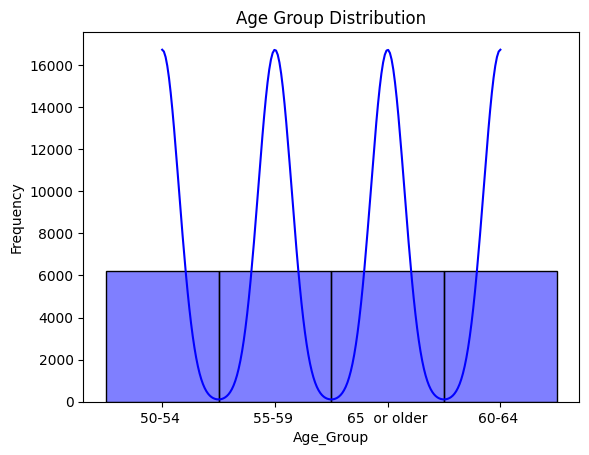

In [23]:
#Data Visualization Steps
#Univariate Analysis
# Plot a histogram for the 'Age_Group Column'
sns.histplot(df['Age_Group'], bins = 5, kde = True, color='blue') # kde adds a density curve
plt.title('Age Group Distribution')
plt.xlabel('Age_Group')
plt.ylabel('Frequency')
plt.show()             
             


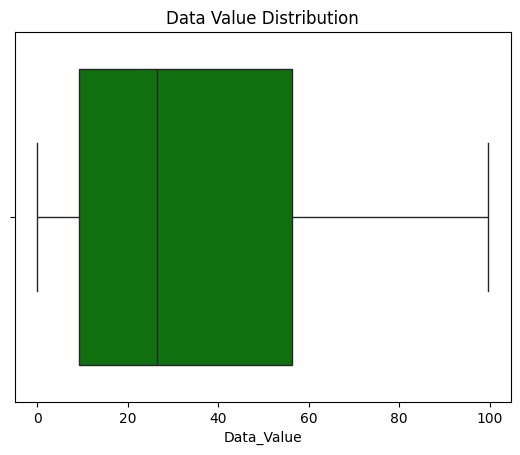

In [24]:
# Plot a box plot for the 'Data_Value' column
sns.boxplot(x = df['Data_Value'],color='green')
plt.title('Data Value Distribution')
plt.xlabel('Data_Value')
plt.show()


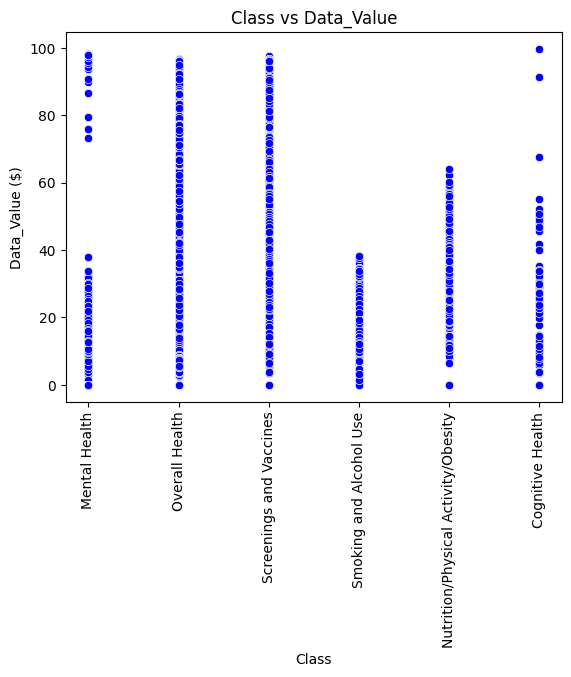

In [25]:
#scatter plots to visualize numerical variables against each other
sns.scatterplot(data=df,x = 'Class', y = 'Data_Value', color = 'blue')
plt.title('Class vs Data_Value')
plt.xlabel('Class')
plt.xticks(rotation=90)
plt.ylabel('Data_Value ($)')
plt.show()


C:\Users\HABEEB\AppData\Local\Temp\ipykernel_30044\70124826.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x = 'Class', y = 'Data_Value', errorbar = None, palette = 'muted')


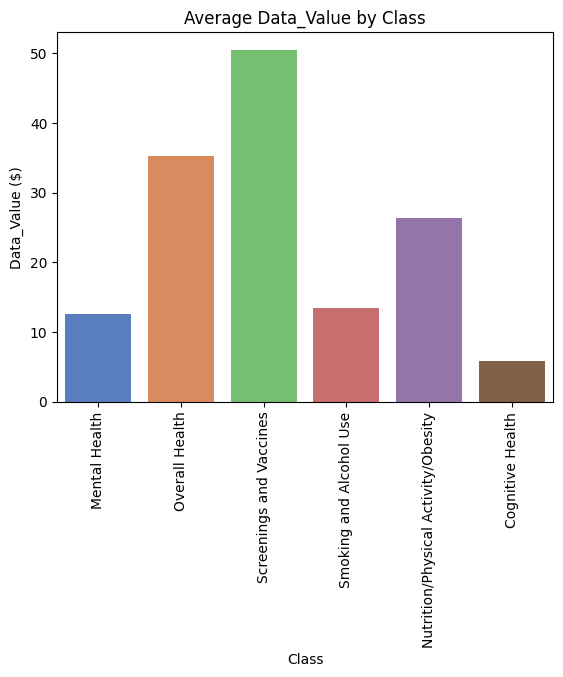

In [26]:
#Bar Plot
sns.barplot(data = df, x = 'Class', y = 'Data_Value', errorbar = None, palette = 'muted')
plt.title('Average Data_Value by Class')
plt.xlabel('Class')
plt.xticks(rotation=90)
plt.ylabel('Data_Value ($)')
plt.show()


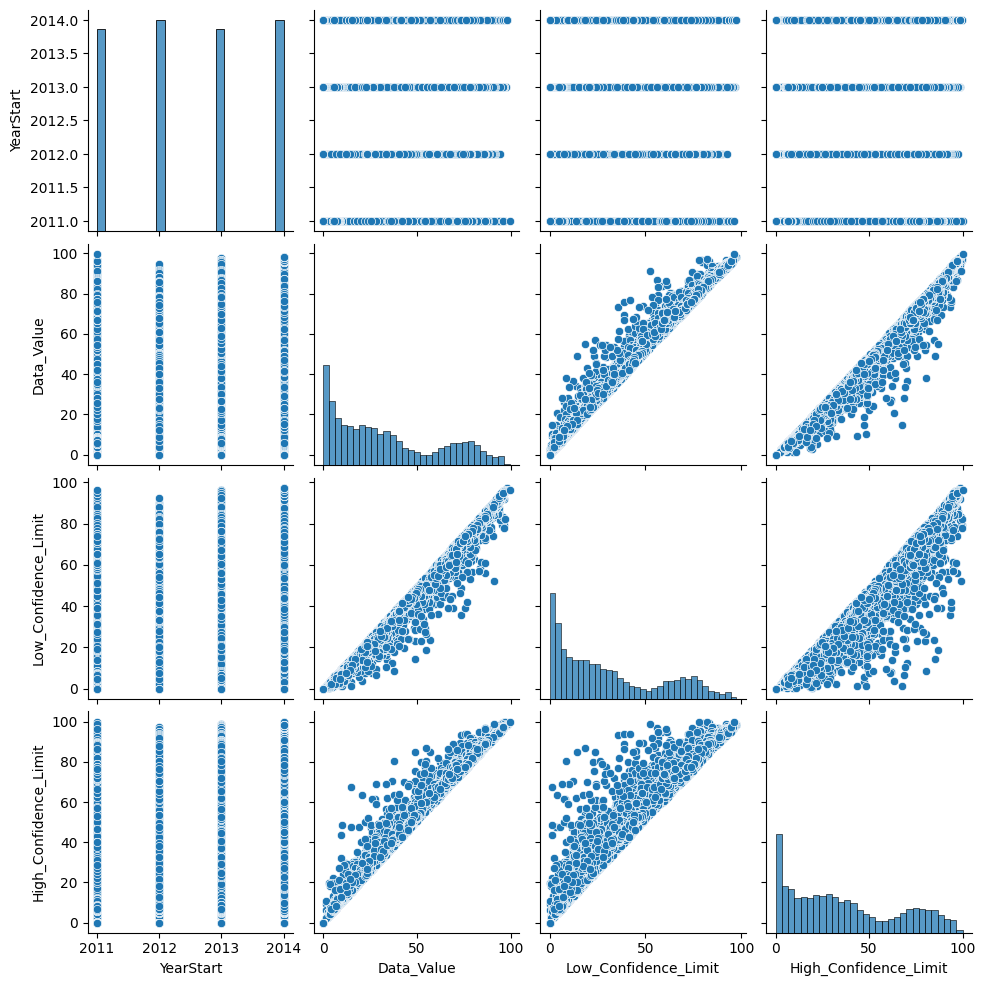

In [27]:
# Pair plot for selected columns (numerical ones)
sns.pairplot(df)
plt.show()

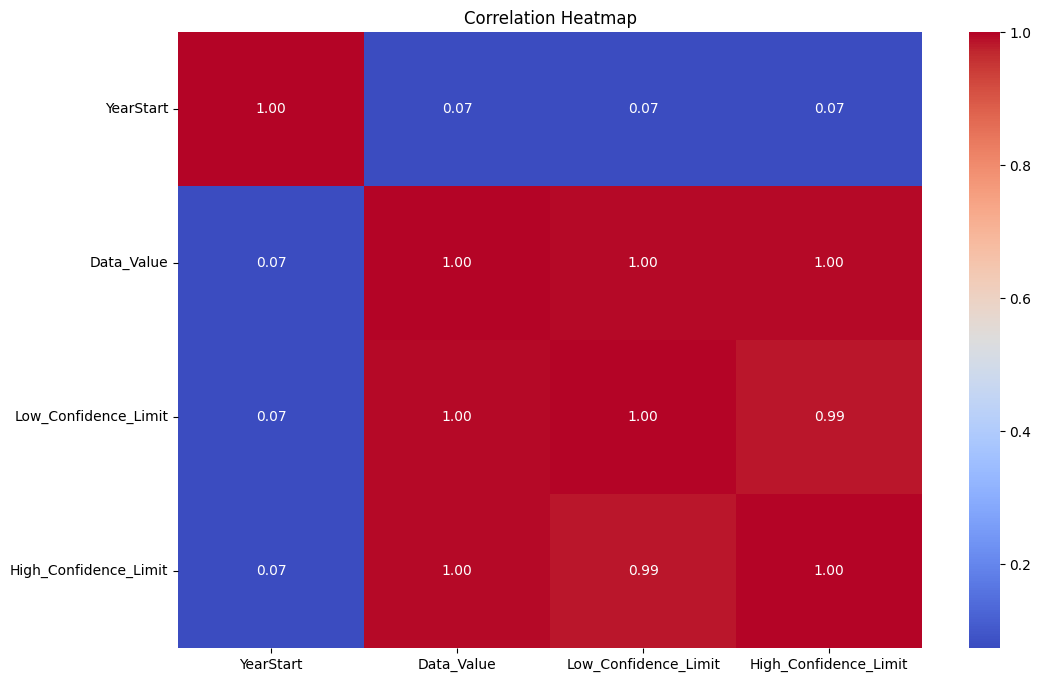

In [28]:
#Heatmap for Correlation
# Calculate correlation matrix
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

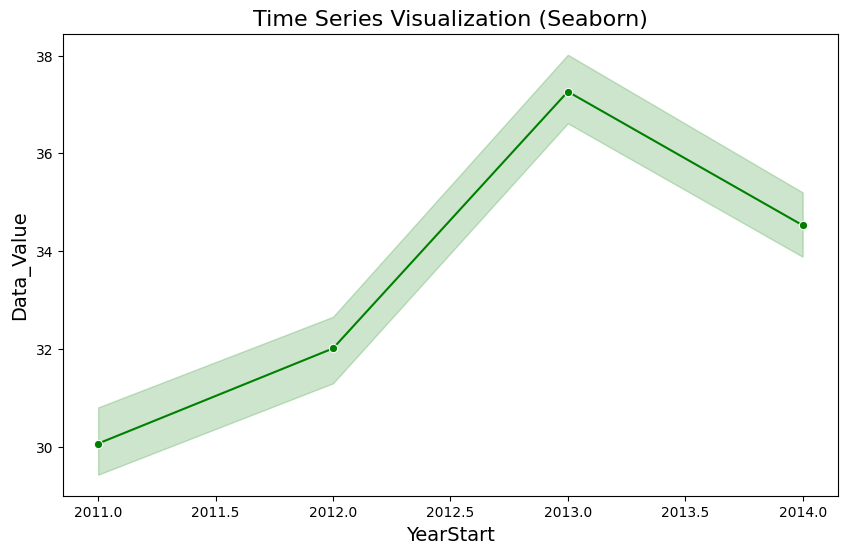

In [29]:
# Seaborn lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='YearStart', y='Data_Value', marker='o', color='green')
plt.title("Time Series Visualization (Seaborn)", fontsize=16)
plt.xlabel("YearStart", fontsize=14)
plt.ylabel("Data_Value", fontsize=14)
#plt.grid(True)  # Ensure plt.grid is being used as a function
plt.show()       
           

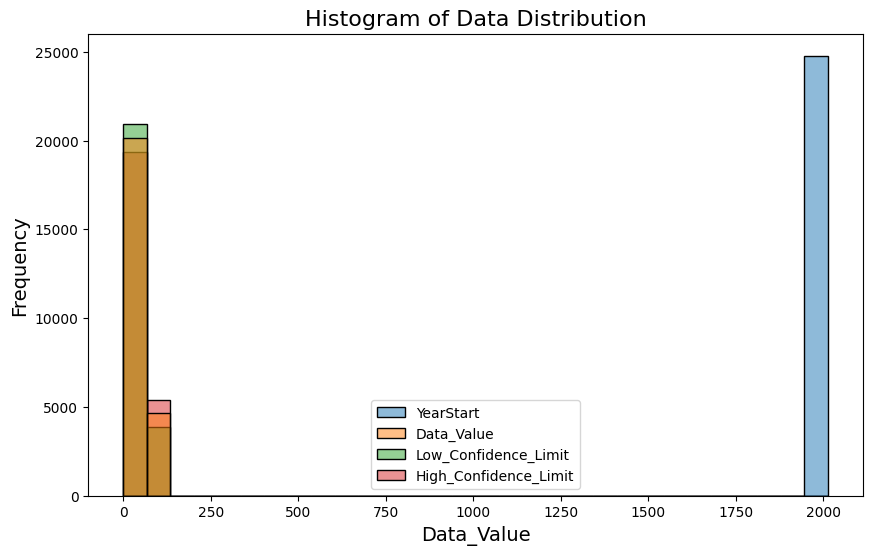

In [30]:
# Plot histogram
data = df
plt.figure(figsize = (10,6))
sns.histplot(data, bins=30, kde=False, color='blue')
plt.title("Histogram of Data Distribution", fontsize = 16)
plt.xlabel("Data_Value", fontsize = 14)
plt.ylabel("Frequency", fontsize =14)
plt.grid = (True)
plt.show()

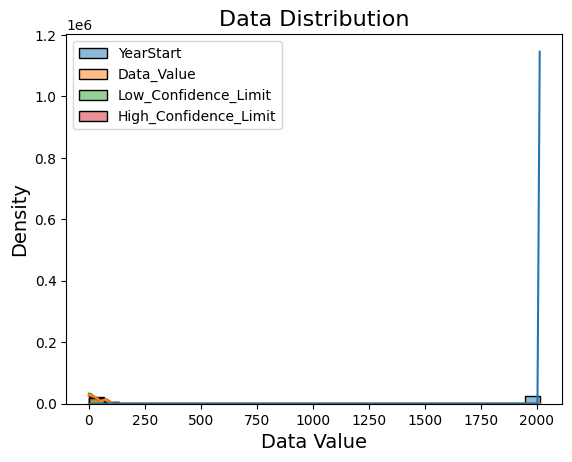

In [31]:
# KDE Plot
data = df
# Plot histogram with KDE
sns.histplot(data, kde=True, bins=30, color="blue")
plt.title("Data Distribution", fontsize=16)
plt.xlabel("Data Value", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.show()

In [45]:
#Project Phase2 , Implementing Machine learning Models

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Step 2: Train the model
model.fit(X_train, Y_train)

# Step 3: Make predictions
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

# Step 4: Evaluate the model
train_rmse = mean_squared_error(Y_train, Y_train_pred, squared=False)
test_rmse = mean_squared_error(Y_test, Y_test_pred, squared=False)
train_r2 = r2_score(Y_train, Y_train_pred)
test_r2 = r2_score(Y_test, Y_test_pred)

print("\nModel Performance:")
print(f"Training RMSE: {train_rmse:.2f}, R²: {train_r2:.2f}")
print(f"Testing RMSE: {test_rmse:.2f}, R²: {test_r2:.2f}")

                              


Model Performance:
Training RMSE: 0.08, R²: 1.00
Testing RMSE: 0.11, R²: 1.00


C:\Users\HABEEB\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\HABEEB\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [49]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [34]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import pandas as pd
import joblib


In [35]:
# Splitting dataset
x = df.drop('Data_Value', axis = 1)
y = df['Data_Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing
categorical_features = ['Class']
numeric_features = ['Low_Confidence_Limit', 'High_Confidence_Limit']

# Define transformations
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the full pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Evaluate the pipeline
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Save the pipeline
joblib.dump(pipeline, 'pipeline_model.pkl')

print("Pipeline saved successfully!")

# To load and use the pipeline later
loaded_pipeline = joblib.load('pipeline_model.pkl')
predictions = loaded_pipeline.predict(X_test)
print("Predictions:", predictions)

Pipeline saved successfully!
Predictions: [ 7.169  87.347   0.     ... 24.4886 13.797   8.104 ]
